In [1]:
# Import the libraries which are neccessary, and set the plots to be in line
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import time
%matplotlib inline

In [2]:
# Create the chosen graph using networkx, the nodes and the edges can be changed as desired
G = nx.Graph()
G.add_nodes_from(['s', 2, 3, 4, 5, 6])
G.add_edge('s', 2, weight = 3)
G.add_edge('s', 4, weight = 4)
G.add_edge('s', 3, weight = 2)
G.add_edge(3, 2, weight = 4)
G.add_edge(3, 6, weight = 3)
G.add_edge(2, 4, weight = 7)
G.add_edge(2, 5, weight = 5)  
G.add_edge(4, 6, weight = 10)
G.add_edge(6, 5, weight = 1)

{('s', 2): Text(-0.4945795732331463, 0.15804681263577763, '3'),
 ('s', 4): Text(-0.37112909096639235, -0.10918986150074343, '4'),
 ('s', 3): Text(-0.5776648824874931, -0.3754040595903188, '2'),
 (2, 3): Text(-0.2140738645976621, -0.1552406132448557, '4'),
 (2, 4): Text(-0.007538073076561284, 0.1109735848447197, '7'),
 (2, 5): Text(0.20166931701235233, 0.6891051294906203, '5'),
 (3, 6): Text(0.16945977395403952, -0.5799152679898765, '3'),
 (4, 6): Text(0.37599556547514035, -0.31370106990030105, '10'),
 (5, 6): Text(0.5852029555640539, 0.26443047474559955, '1')}

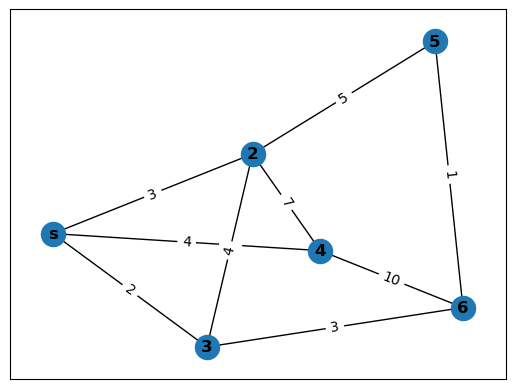

In [3]:
pos=nx.spring_layout(G)  
nx.draw_networkx(G, pos, with_labels=True, font_weight='bold')
labels = nx.get_edge_attributes(G,'weight')
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels = labels)

In [4]:
# Produce the distance vector

# Find the number of nodes in the graph
num_nodes = G.number_of_nodes()

# Make a list of distances, of the length of the number of nodes
# To start with initialise the list to have distances of infinity
dist = [np.inf for i in range(num_nodes)]
print(dist)

[inf, inf, inf, inf, inf, inf]


In [5]:
# Assuming that the start node is first vertex, set the first entry to 0 - but can be changed as required
dist[0] = 0

# Print the distance vector to check
print(dist)

[0, inf, inf, inf, inf, inf]


In [6]:
# Set T to be a list of the nodes
T = list(G.nodes())

In [7]:
# The function which implements Dijkstra algorithm
def dijkstra(G, T, start):

    # For the first run, the current node will be the start node
    current_node = start

    # Initialize the iteration
    iteration = 0

    # While T is a non-empty list, carry out the following algorithm, but break once T is empty
    while len(T) > 0:

        print("Iteration: ", iteration)
        print("Current node: ", current_node)

        # Find the neighbours of the current node
        neighbours = list(G.neighbors(current_node))

        # Only accept the neighbours that are in T
        neighbours = [neighbour for neighbour in neighbours if neighbour in T]
        print("Neighbours: ", neighbours)

        # Calculate the total weight of the path from the current node to each of its neighbours and store in a list
        weights = []
        for neighbour in neighbours:
            
            # Find the weight of the edge between the current node and the neighbour
            weight = G[current_node][neighbour]['weight']

            # Append to the weights list both the total weight and the neighbour which corresponds so that we can find the minimum and which node it corresponds to
            weights.append((neighbour, weight))

        # For the first iteration, the distance to the neighbouring nodes is the weight of the edge
        if iteration == 0:
            dist[0] = (start, 0)
            for n in range(len(neighbours)):
                dist[n+1] = weights[n]

        # Print the weights to check
        print("Weights: ", weights)

        #Find the minimum total weight and the corresponding node
        min_weight = min(weights, key = lambda x: x[1])
        print("Min weight: ", min_weight)

        # The next node will be the one which has the minimum weight
        next_node = min_weight[0]
        print("Next node: ", next_node)

        # For each iteration bigger than 0, update the distance vector as the total weight of the path from the start node to the current node plus the weight of the edge from the current node to the next node
        if iteration > 0:
           
            # Find the index in the distance list of the first infinity
            index = dist.index(np.inf)
            
            # Update the distance list at the index of the first infinity 
            # Need to add the distances which connect the start node to the current node and the current node to the next node
            # This is done by adding the distance associated with the current node to the distance associated with the next node
            dist[index] = (next_node, dist[index-1][1] + min_weight[1])

            
        # If the start node is present in the T list, remove it
        if start in T:
            T.remove(start)
        
        # Remove the current node from T
        T.remove(next_node)

        # If it is the first iteration, remove any of the neighbours which are still in T
        if iteration == 0:
            for neighbour in neighbours:
                if neighbour in T:
                    T.remove(neighbour)
        
        # Print T to check
        print("T: ", T)
        
        # Change the current node to be the identified next node
        current_node = next_node
        
        # Print the distance vector to check
        print("distances:", dist)
        
        # Add one to the iteration
        iteration += 1

        print("\n")
        
    return dist

In [8]:
# Run the dijkstra algorithm

dijkstra(G, T, 's')

Iteration:  0
Current node:  s
Neighbours:  [2, 4, 3]
Weights:  [(2, 3), (4, 4), (3, 2)]
Min weight:  (3, 2)
Next node:  3
T:  [5, 6]
distances: [('s', 0), (2, 3), (4, 4), (3, 2), inf, inf]


Iteration:  1
Current node:  3
Neighbours:  [6]
Weights:  [(6, 3)]
Min weight:  (6, 3)
Next node:  6
T:  [5]
distances: [('s', 0), (2, 3), (4, 4), (3, 2), (6, 5), inf]


Iteration:  2
Current node:  6
Neighbours:  [5]
Weights:  [(5, 1)]
Min weight:  (5, 1)
Next node:  5
T:  []
distances: [('s', 0), (2, 3), (4, 4), (3, 2), (6, 5), (5, 6)]




[('s', 0), (2, 3), (4, 4), (3, 2), (6, 5), (5, 6)]

In [9]:
# Run the networkx dijkstra algorithm to compare and check the results
d = nx.single_source_dijkstra_path_length(G, 's')
print(d)

{'s': 0, 3: 2, 2: 3, 4: 4, 6: 5, 5: 6}
